In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mldlpy3

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn import tree

In [4]:
ah = pd.read_csv('data/testfin2.csv', encoding='utf-8')

In [5]:
plt.rc('font', family='NanumGothic')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus']=False

In [6]:
ah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   아파트/계      25 non-null     float64
 1   다세대주택/계    25 non-null     float64
 2   연립주택/계     25 non-null     float64
 3   단독주택/계     25 non-null     float64
 4   20대1인      25 non-null     float64
 5   40대1인      25 non-null     float64
 6   생활폐기물재활용률  25 non-null     float64
 7   생활폐기물배출량   25 non-null     float64
dtypes: float64(8)
memory usage: 1.7 KB


In [7]:
data = ah.iloc[:, 0:7]
target = ah.iloc[:, 7]

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
data = StandardScaler().fit_transform(data)

In [10]:
cov_matrix = np.cov(data.T)
cov_matrix

array([[ 1.04166667, -0.672234  , -0.85508964, -0.72066435, -0.16791181,
        -0.06083947, -0.46749836],
       [-0.672234  ,  1.04166667,  0.25780965,  0.71171035,  0.23329326,
         0.02491009,  0.03145537],
       [-0.85508964,  0.25780965,  1.04166667,  0.17725888, -0.12834994,
         0.10818572,  0.36238094],
       [-0.72066435,  0.71171035,  0.17725888,  1.04166667,  0.46457561,
        -0.02858568,  0.44862576],
       [-0.16791181,  0.23329326, -0.12834994,  0.46457561,  1.04166667,
        -0.85450388,  0.3052231 ],
       [-0.06083947,  0.02491009,  0.10818572, -0.02858568, -0.85450388,
         1.04166667, -0.01945777],
       [-0.46749836,  0.03145537,  0.36238094,  0.44862576,  0.3052231 ,
        -0.01945777,  1.04166667]])

In [11]:
eigval, eigvec = np.linalg.eig(cov_matrix)
eigval, eigvec

(array([3.12807521e+00, 1.97035096e+00, 1.11250769e+00, 8.23287783e-01,
        1.94667262e-01, 2.63334280e-04, 6.25144320e-02]),
 array([[ 0.537502  , -0.21241444, -0.05833433, -0.21021127,  0.21151364,
         -0.75726931, -0.01360946],
        [-0.41488684,  0.04626157, -0.60056962,  0.12419234,  0.66085415,
         -0.11147446,  0.02159674],
        [-0.35053693,  0.35004076,  0.41210048,  0.5227676 , -0.0540582 ,
         -0.53635698, -0.14450418],
        [-0.48588537, -0.07986386, -0.3003591 , -0.38661721, -0.56826939,
         -0.35544586,  0.26187183],
        [-0.25552865, -0.63778951,  0.04981501,  0.00339321, -0.04884008,
         -0.00789539, -0.72317972],
        [ 0.07558637,  0.6455857 , -0.17243588, -0.42102357, -0.05585063,
         -0.00198768, -0.60612505],
        [-0.33013875, -0.01663866,  0.5862211 , -0.58340064,  0.43263927,
          0.00545726,  0.13969094]]))

In [12]:
eigval/sum(eigval)

array([4.28993172e-01, 2.70219560e-01, 1.52572483e-01, 1.12908039e-01,
       2.66972246e-02, 3.61144156e-05, 8.57340781e-03])

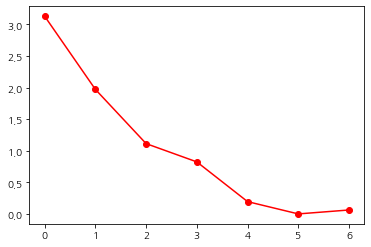

In [13]:
plt.plot(eigval, 'ro-')

#### 주성분분석 결과 4 이후 다중공선성이 높은 변수 2개 정도는 큰 의미없음
#### 아파트와 연립주택 제거

In [14]:
ah['배출분류']= 0
ah['배출분류']=pd.cut(ah.생활폐기물배출량, bins=[170,269.4,368.7,468], labels=[0,1,2])

In [15]:
ah = ah.iloc[:, [1,3,4,5,6,8]]

In [16]:
ah

,다세대주택/계,단독주택/계,20대1인,40대1인,생활폐기물재활용률,배출분류
0,0.117,0.262,0.276450,0.124658,0.508578,0
1,0.046,0.141,0.232492,0.131519,0.418840,1
2,0.053,0.189,0.216507,0.115561,0.545222,0
3,0.022,0.115,0.272091,0.126453,0.598687,0
4,0.045,0.171,0.299337,0.111828,0.662907,0
5,0.032,0.165,0.335330,0.107690,0.645729,1
6,0.040,0.165,0.135112,0.177458,0.633947,1
7,0.045,0.162,0.325134,0.106032,0.653512,1
8,0.049,0.180,0.156222,0.158892,0.572635,0
9,0.039,0.081,0.113548,0.165262,0.529902,0


#### 배출분류를 높음, 중간, 낮음 순으로 2, 1, 0 으로 지정. 1/3씩 나눠서 분류

In [17]:
data = ah.iloc[:, :5]
target = ah.iloc[:, 5]

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size=0.3, stratify = target, random_state=2111121625)

In [27]:
dtclf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtclf.fit(Xtrain, ytrain)
pred = dtclf.predict(Xtest)

In [28]:
accuracy_score(ytest, pred)

0.5

In [29]:
dtclf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtclf.fit(Xtrain, ytrain)
pred = dtclf.predict(Xtest)

In [30]:
accuracy_score(ytest, pred)

0.625

In [31]:
dtclf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtclf.fit(Xtrain, ytrain)
pred = dtclf.predict(Xtest)

In [32]:
accuracy_score(ytest, pred)

0.75

In [33]:
import matplotlib.image as pltimg

In [34]:
cols = ['다세대주택/계','단독주택/계','20대1인','40대1인','생활폐기물재활용률']

In [35]:
dot_data = tree.export_graphviz(dtclf, out_file=None, feature_names=cols, class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('test5.png')

True

(-0.5, 830.5, 580.5, -0.5)

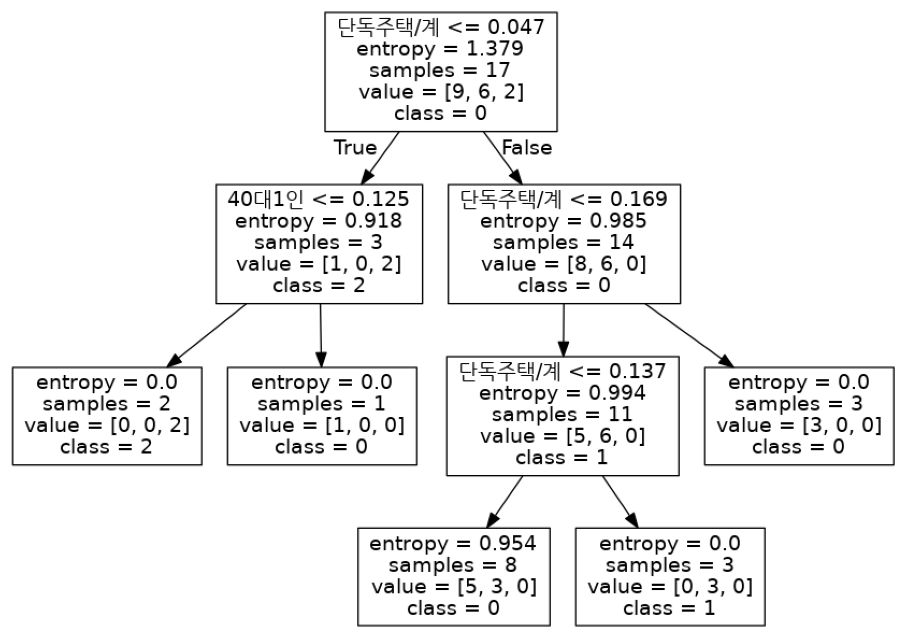

In [249]:
img = plt.imread('test5.png')
plt.figure(figsize=(16,14))
plt.imshow(img)
plt.axis('off')

#### 의사결정나무 분류에서는 단독주택 비율이 0.169보다 높으면 생활폐기물 배출량이 적고, 0.169보다 작지만 0.137보다 높을 경우 중간 정도의 배출량
#### 단독주택 비율이 0.047 보다 작지만 40대 1인가구 비중이 0.125보다 작을 경우 생활폐기물 배출량이 높음, 40대 1인가구 비중이 0.125보다 클 경우 생활폐기물 배출량이 적음

In [37]:
ah.describe()

,다세대주택/계,단독주택/계,20대1인,40대1인,생활폐기물재활용률
count,25.000000,25.00000,25.000000,25.000000,25.000000
mean,0.040800,0.11692,0.228688,0.122407,0.527767
std,0.020244,0.05815,0.075583,0.025934,0.097798
min,0.014000,0.03500,0.113548,0.076799,0.322735
25%,0.026000,0.07200,0.183511,0.107690,0.458910
50%,0.040000,0.12500,0.205496,0.115722,0.529902
75%,0.049000,0.16500,0.298344,0.134165,0.604371
max,0.117000,0.26200,0.371252,0.177458,0.662907


In [251]:
xdata = ah.iloc[:, [1,3]]    
dtclf.fit(xdata, target)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [252]:
xdata = np.array(xdata)

/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/hadoop/mldlpy3.py:38: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


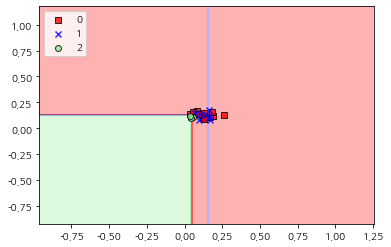

In [253]:
mldlpy3.plot_decision_regions(xdata, target, dtclf)

<AxesSubplot:>

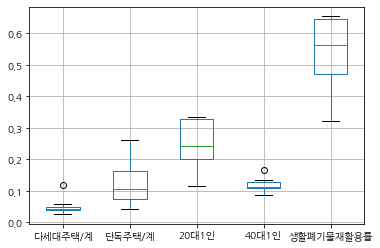

In [255]:
Xtest.boxplot()

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
svcf = BaggingClassifier(SVC(), n_estimators=30, max_samples=175, bootstrap=True, n_jobs=-1)

In [ ]:
from sklearn.svm import SVC

In [91]:
import svm_visual

In [140]:
data = ah.iloc[:, 3:5]
target = ah.iloc[:, 8]

In [176]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size=0.3, stratify = target, random_state=2111161155)

In [177]:
svc = SVC(kernel='rbf',)
svc.fit(Xtrain, ytrain)
pred = svc.predict(Xtest)

In [178]:
svc.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(0.5294117647058824, 0.5)

In [179]:
svm_visual.plot_decision_regions(np.array(data), np.array(target), svc)
plt.plot(3,2,'kX')

/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


ValueError: X has 2 features, but SVC is expecting 7 features as input.

/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/home/hadoop/svm_visual.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolor='black')


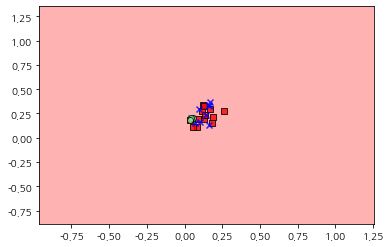

In [145]:
svm_visual.plot_decision_regions(np.array(data), np.array(target), svc)
plt.plot(6,4,'kX')

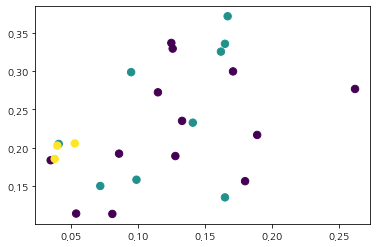

In [147]:
plt.scatter(ah.iloc[:,3], ah.iloc[:,4], c=ah.iloc[:,8], s=55)

In [155]:
data1 = np.array(ah.iloc[:,3:5])
target1 = np.array(ah.iloc[:, 8])

In [156]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data1, target1, test_size=0.3, stratify = target1, random_state=2111111535)

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [162]:
lcf = LogisticRegression(max_iter=1000)
rfcf = RandomForestClassifier()
svcf = SVC()

In [163]:
voteclf = VotingClassifier(voting='hard', estimators=[('lr',lcf),('rf',rfcf),('sv',svcf)])

In [164]:
voteclf.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()), ('sv', SVC())])

In [165]:
for cf in (lcf, rfcf, svcf, voteclf):
    cf.fit(Xtrain, ytrain)
    pred = cf.predict(Xtest)
    print(cf.__class__.__name__,cf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

LogisticRegression 0.5294117647058824 0.5
RandomForestClassifier 1.0 0.375
SVC 0.5294117647058824 0.5
VotingClassifier 0.5294117647058824 0.5
